### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [2]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [6]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickup_count = df.groupby(df['Date/Time'].dt.date).size()


# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_count.idxmax()

print("Date with the highest number of pickups:", date_with_highest_pickups)
print("Number of pickups on that date:", pickup_count.max())

Date with the highest number of pickups: 2014-08-01
Number of pickups on that date: 10734


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [7]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_pickups_date_df = df[df['Date/Time'].dt.date == date_with_highest_pickups]

# Get the count of pickups on the highest date
pickup_count_highest_date = len(highest_pickups_date_df)

print("Count of pickups on the date with the highest number of pickups:", pickup_count_highest_date)



Count of pickups on the date with the highest number of pickups: 10734


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [10]:
# Count the number of unique TLC base companies
unique_base_count = df['Base'].nunique()

print("Number of unique TLC base companies:", unique_base_count)


Number of unique TLC base companies: 2


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [12]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base = df.groupby('Base').size()

# Find the TLC base company with the highest number of pickups
base_with_highest_pickups = pickup_counts_by_base.idxmax()
highest_pickups_count = pickup_counts_by_base.max()

print("TLC base company with the highest number of pickups:", base_with_highest_pickups)
print("Number of pickups by the highest TLC base company:", highest_pickups_count)



TLC base company with the highest number of pickups: B02512
Number of pickups by the highest TLC base company: 31472


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [14]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base = df.groupby('Base').size()

print("Number of pickups by TLC base company:")
print(pickup_counts_by_base)



Number of pickups by TLC base company:
Base
B02512    31472
B02598    14117
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [15]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts_by_hour = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickup_counts_by_hour.idxmax()
highest_pickups_hour_count = pickup_counts_by_hour.max()

print("Hour with the highest number of pickups:", hour_with_highest_pickups)
print("Number of pickups during the highest hour:", highest_pickups_hour_count)

Hour with the highest number of pickups: 16
Number of pickups during the highest hour: 3313


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

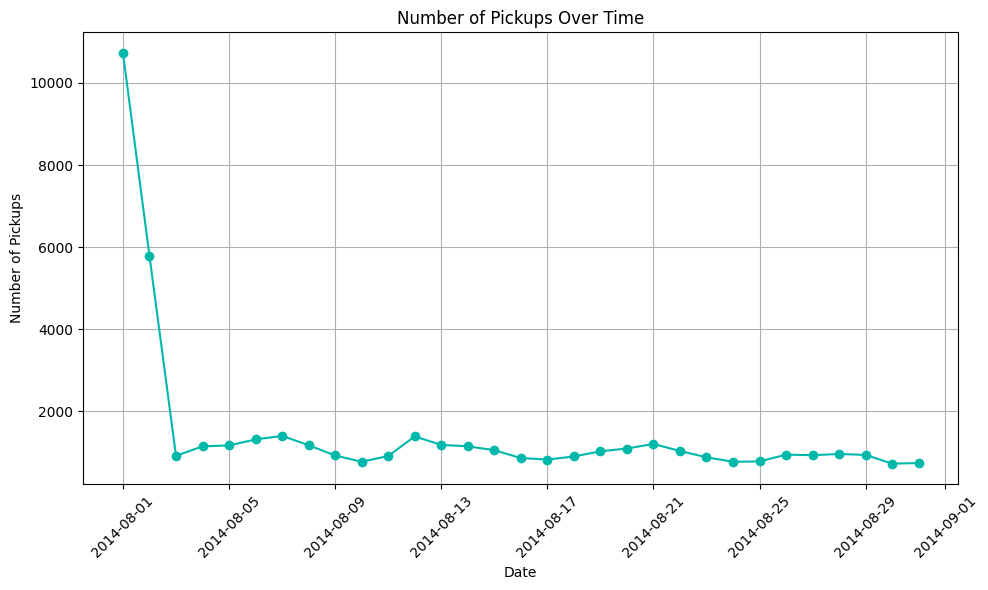

In [23]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Convert the index to datetime for plotting
pickup_counts_by_date.index = pd.to_datetime(pickup_counts_by_date.index)

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(10, 6))
plt.plot(pickup_counts_by_date.index, pickup_counts_by_date.values, marker='o', linestyle='-', color='#01B8AA')
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

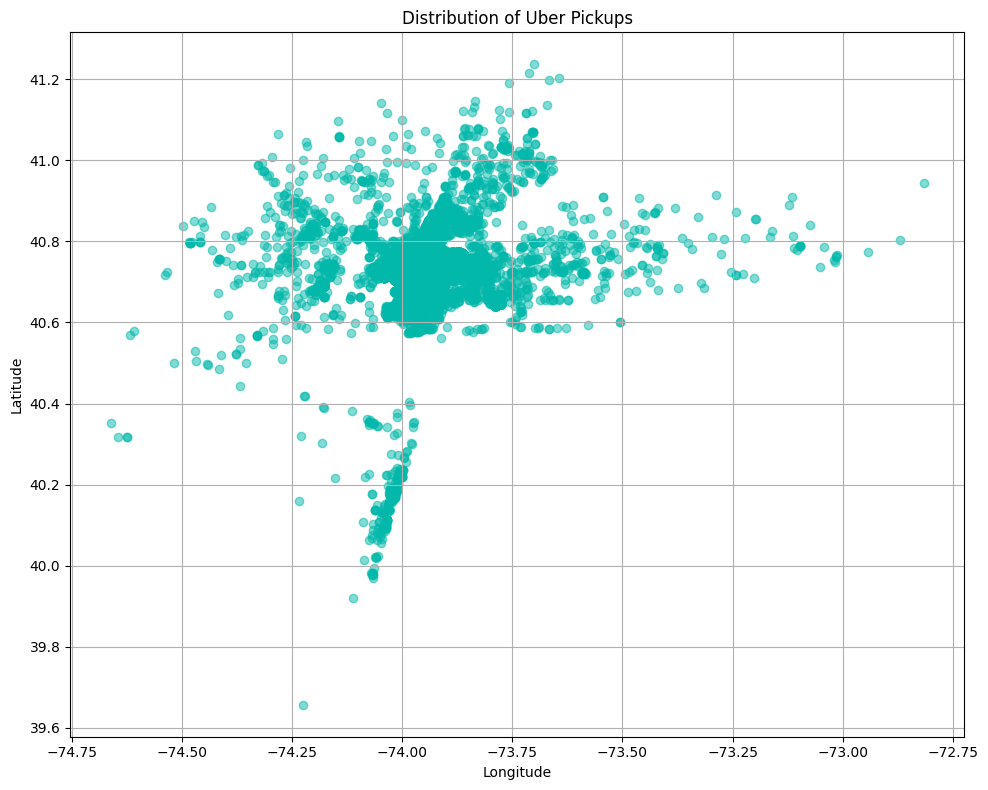

In [22]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['Lon'], df['Lat'], alpha=0.5, color='#01B8AA')
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

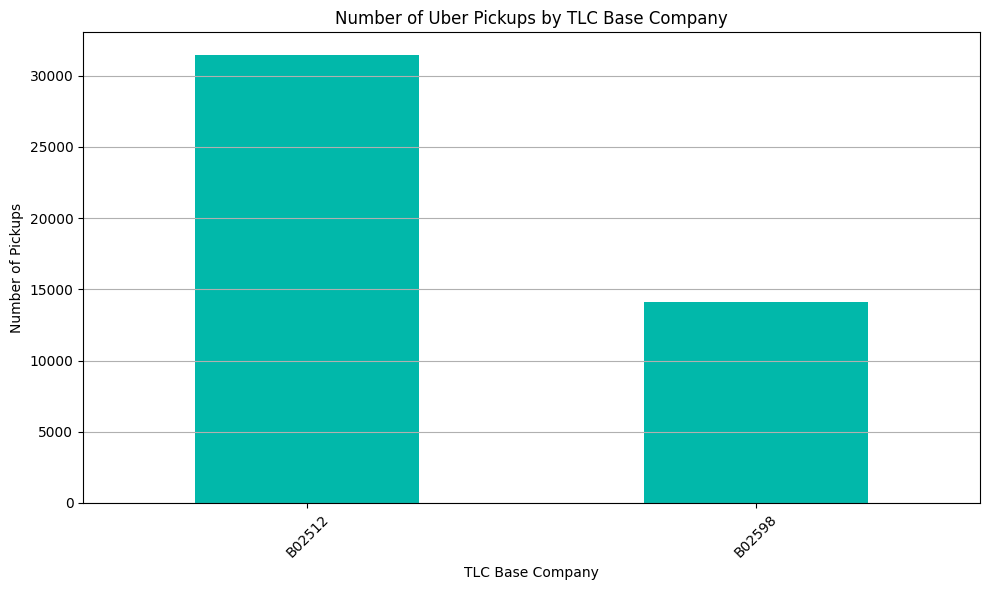

In [21]:
# Count the number of pickups for each TLC base company
pickup_counts_by_base = df['Base'].value_counts()

# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(10, 6))
pickup_counts_by_base.plot(kind='bar', color='#01B8AA')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

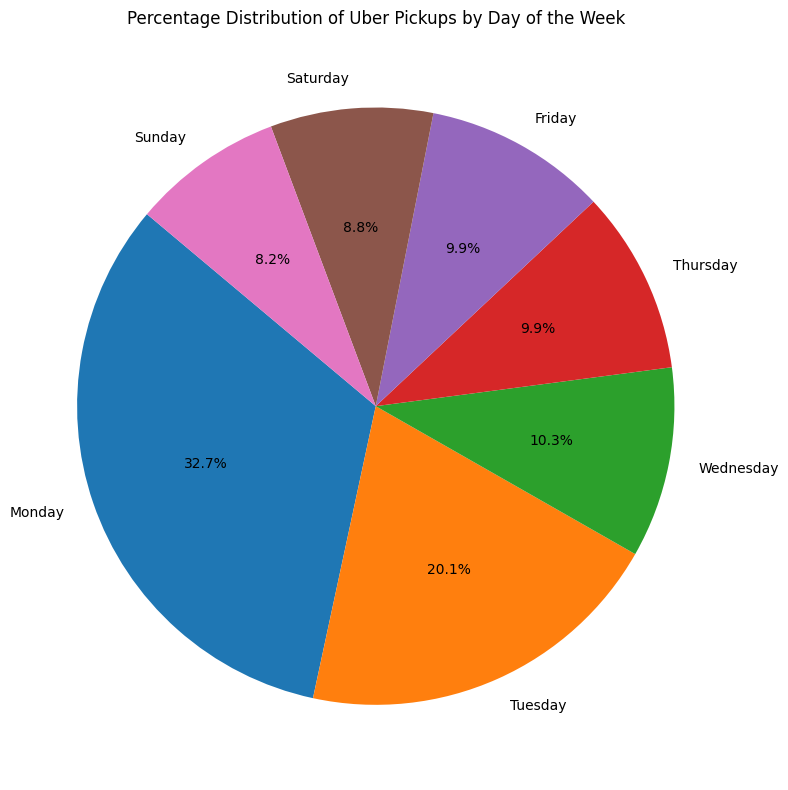

In [25]:
# Group by day of the week and count the number of pickups
pickup_counts_by_day = df['Date/Time'].dt.dayofweek.value_counts()

# Map day of the week index to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 8))
plt.pie(pickup_counts_by_day, labels=day_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()